# Analisa informações gerais dos arquivos de Twitter #

In [51]:
#Arquivo que analisa o volume de tweets de cada série
# Bibliotecas
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from datetime import date

In [52]:
nomes_series = ["SexEducation", "Ozark", "TheWitcher", "StrangerThings"]
lista_df = []

for serie in nomes_series:
    df_serie = pd.read_csv('series_dataset/'+serie+'.csv')
    df_serie["nome_serie"] = serie
    lista_df.append(df_serie)


/Users/mariamaoliveira/opt/anaconda3/envs/teste_apis_projeto/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
lista_df[1].head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,nome_serie
0,1020454599013158912,1020454599013158912,2018-07-20 20:45:10 Hora oficial do Brasil,2018-07-20,20:45:10,-300.0,3.421882e+08,toddcastpodcast,Todd Hancock,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ozark
1,1020448971918061568,1020448971918061568,2018-07-20 20:22:48 Hora oficial do Brasil,2018-07-20,20:22:48,-300.0,3.130876e+09,rubithecat,RubitheCat,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ozark
2,1020428139615477760,1020428139615477760,2018-07-20 19:00:01 Hora oficial do Brasil,2018-07-20,19:00:01,-300.0,8.779945e+17,filmdailynews,Daily,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ozark
3,1020410353228963841,1020410353228963841,2018-07-20 17:49:21 Hora oficial do Brasil,2018-07-20,17:49:21,-300.0,1.950105e+09,she2nice__,Melanin Fiona 🇬🇾,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ozark
4,1020404548853280770,1020404548853280770,2018-07-20 17:26:17 Hora oficial do Brasil,2018-07-20,17:26:17,-300.0,3.034442e+07,whiteoutgotu,Testarossa,NaN,...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Ozark


In [54]:
def setDataframe(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'], format="%Y-%m-%d", errors = 'coerce')
    dataframe[dataframe["id"].duplicated()]
    

In [55]:
for df in lista_df:
    setDataframe(df)

In [56]:
# todos_df.groupby(["nome_serie", "date"])["date"].count()

In [57]:
# filtro_dados = (df_TheWitcher["date"] > pd.Timestamp(2020, 1, 1)) & (df_TheWitcher["date"] <  pd.Timestamp(2020, 2, 8)

#Criar tuplas de visualização
tuplas_vis = []
for df in lista_df:
    y = df['date'].value_counts()
    x = df['date'].value_counts().index.tolist()

    tuplas_vis.append((x,y))

<AxesSubplot:ylabel='date'>

Text(0.5, 1.0, 'SexEducation')

Text(0, 0.5, 'Número Total de Twitts')

Text(0.5, 0, 'Dia')

<AxesSubplot:ylabel='date'>

Text(0.5, 1.0, 'Ozark')

Text(0, 0.5, 'Número Total de Twitts')

Text(0.5, 0, 'Dia')

<AxesSubplot:ylabel='date'>

Text(0.5, 1.0, 'TheWitcher')

Text(0, 0.5, 'Número Total de Twitts')

Text(0.5, 0, 'Dia')

<AxesSubplot:ylabel='date'>

Text(0.5, 1.0, 'StrangerThings')

Text(0, 0.5, 'Número Total de Twitts')

Text(0.5, 0, 'Dia')

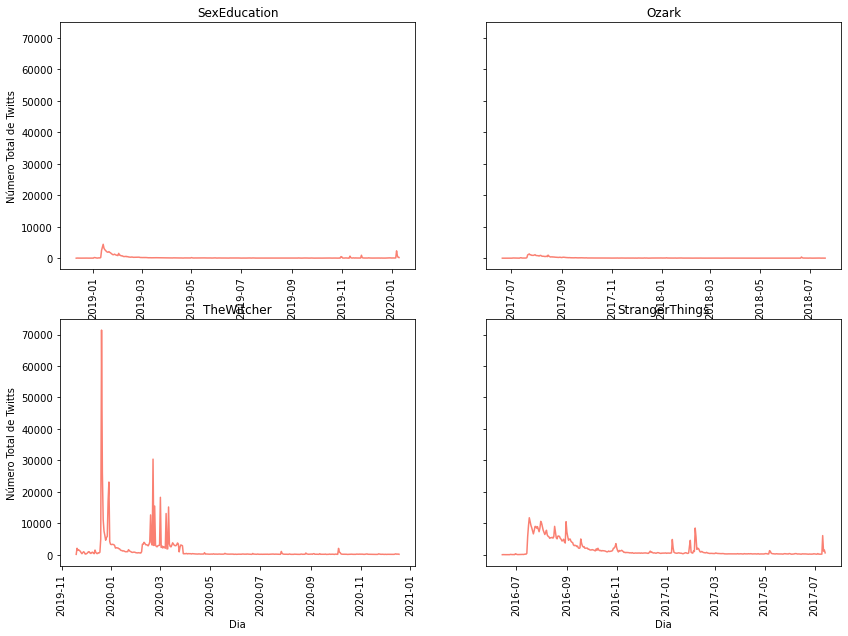

In [65]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

sns.lineplot(ax=axes[0,0], x = tuplas_vis[0][0], y = tuplas_vis[0][1], color="salmon")
axes[0,0].tick_params(rotation=90, axis='x')
axes[0,0].set_title(nomes_series[0])
axes[0,0].set_ylabel('Número Total de Twitts')
axes[0,0].set_xlabel('Dia')

sns.lineplot(ax=axes[0,1], x = tuplas_vis[1][0], y = tuplas_vis[1][1], color="salmon")
axes[0,1].tick_params(rotation=90, axis='x')
axes[0,1].set_title(nomes_series[1])
axes[0,1].set_ylabel('Número Total de Twitts')
axes[0,1].set_xlabel('Dia')

sns.lineplot(ax=axes[1,0], x = tuplas_vis[2][0], y = tuplas_vis[2][1], color="salmon")
axes[1,0].tick_params(rotation=90, axis='x')
axes[1,0].set_title(nomes_series[2])
axes[1,0].set_ylabel('Número Total de Twitts')
axes[1,0].set_xlabel('Dia')

sns.lineplot(ax=axes[1,1], x = tuplas_vis[3][0], y = tuplas_vis[3][1], color="salmon")
axes[1,1].tick_params(rotation=90, axis='x')
axes[1,1].set_title(nomes_series[3])
axes[1,1].set_ylabel('Número Total de Twitts')
axes[1,1].set_xlabel('Dia')
